# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

numpy.histogram returns two arrays: the bin counts array and the bins edges array. The two arrays do not have the same length.
Bin counts array length: 10
Bin edges array length: 11
To plot the binned data, we need to deal with the different lengths of bin_counts and bin_edges.
Thus, we can repeat the bin counts so that the counts values correspond to each edge of the binning intervals.
We have to repeat the bin edges to match the bin counts (without the first and last element, they only appear once.



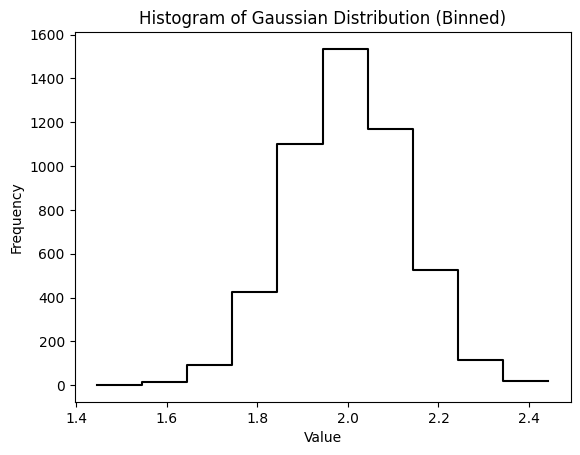

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#GAUSSIAN DISTRIBUTION

# Generate 5000 data points from a Gaussian distribution
mean = 2
std_dev = 0.125
data = np.random.normal(mean, std_dev, 5000)

# Use numpy.histogram to bin the data into 10 bins
bin_counts, bin_edges = np.histogram(data, bins=10)
print('numpy.histogram returns two arrays: the bin counts array and the bins edges array. The two arrays do not have the same length.')
print('Bin counts array length: {}'.format(len(bin_counts)))
print('Bin edges array length: {}'.format(len(bin_edges)))

print('To plot the binned data, we need to deal with the different lengths of bin_counts and bin_edges.\n\
Thus, we can repeat the bin counts so that the counts values correspond to each edge of the binning intervals.\n\
We have to repeat the bin edges to match the bin counts (without the first and last element, they only appear once.\n')

bin_counts_repeated = np.repeat(bin_counts, 2)
bin_edges_repeated = np.repeat(bin_edges, 2)[1:-1]

# Plot the binned data using plt.plot
plt.plot(bin_edges_repeated,bin_counts_repeated, drawstyle='steps-post', color='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Gaussian Distribution (Binned)')
plt.show()

* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 

The minimum value of the distribution: 0
The maximum value of the distribution: 23
Sum over bin counts: 4999
It is not correct to set the first value for binning vector equal to the minimum value of the distribution and same goes for the maximum value.
When plotted, the histogram will centre the intervals at the mean of the interval edges, so we have to shift the intervals by 0.5.
And because we will also eliminate the last value in bin_edges, we will set the min_v = min_value + 0.5 and max_v = max_value + 1.5.



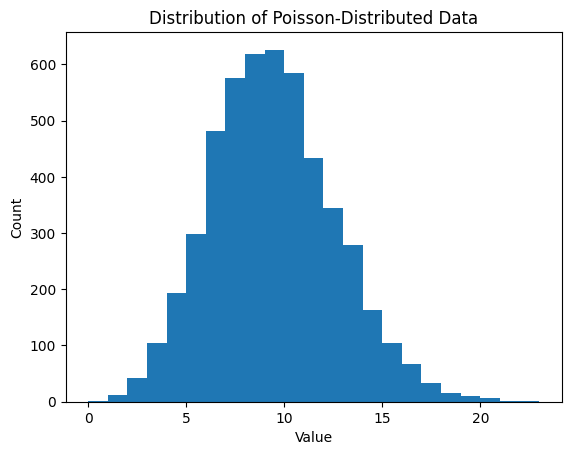

In [2]:
#POISSON DISTRIBUTION

N = 5000
lam = 10
data_p = np.random.poisson(lam, N)
min_value = np.min(data_p)
max_value = np.max(data_p)
print('The minimum value of the distribution: {}'.format(min_value))
print('The maximum value of the distribution: {}'.format(max_value))

bin_edges = np.arange(min_value + 0.5, max_value + 1.5, 1)
bin_counts, _ = np.histogram(data_p, bins=bin_edges)
print('Sum over bin counts: {}'.format(np.sum(bin_counts)))
print('It is not correct to set the first value for binning vector equal to the minimum value of the distribution\
 and same goes for the maximum value.\nWhen plotted, the histogram will centre the intervals at the mean of the interval edges,\
 so we have to shift the intervals by 0.5.\nAnd because we will also eliminate the last value in bin_edges,\
 we will set the min_v = min_value + 0.5 and max_v = max_value + 1.5.\n')

plt.bar(bin_edges[:-1], bin_counts, width=1.0, align='center')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Poisson-Distributed Data')
plt.show()

* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

Minimum degree: 1
Maximum degree: 25


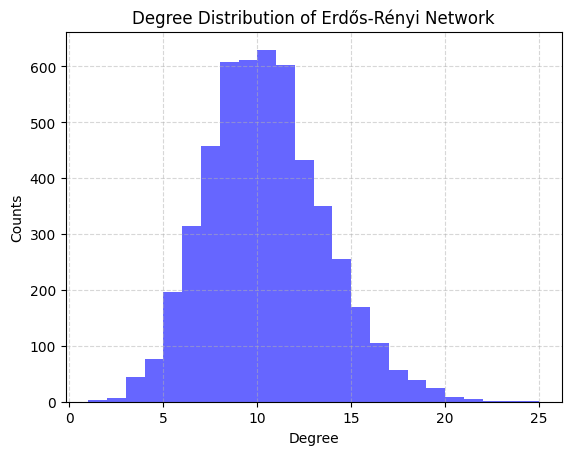

In [3]:
k = 10
N = 5000
p = k / (N - 1)
G= nx.erdos_renyi_graph(N, p)

degrees = [G.degree(n) for n in G.nodes()]
print('Minimum degree: {}'.format(min(degrees)))
print('Maximum degree: {}'.format(max(degrees)))

# Add 1 to max degree to shift the intervals so the plotting is correct. 
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), alpha=0.6, color='b')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree Distribution of Erdős-Rényi Network')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#HOMEWORK SECTION 3.11

N = 3000
p = 1e-3

#What is the expected number of links?
#〈L〉 = (N * (N - 1) / 2) * p
# expected number of links, <L>
L = p*N*(N-1)/2
print('The expected number of links: ',L)

#In which regime is the network?
if p < 1 / N:
    regime = "Subcritical"
elif p > 1 / N:
    regime = "Supercritical"
else:
    regime = "Critical"
print('The network is in the', regime, 'regime.')

#Calculate the probability pc so that the network is at the critical point
pc = 1 / N
print("Critical probability (pc):", pc)

#Given the linking probability p = 10–3, calculate the numbers of nodes Ncr so that the network has only one component.
p = 1e-3
Ncr = int(1 / p - 1)
print("Number of nodes for a single component (Ncr):", Ncr)

#For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.
G = nx.erdos_renyi_graph(Ncr, p)
Kcr = p * (Ncr - 1)
print('Average degree: {}'.format(Kcr))

The expected number of links:  4498.5
The network is in the Supercritical regime.
Critical probability (pc): 0.0003333333333333333
Number of nodes for a single component (Ncr): 999
Average degree: 0.998


Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

Minimum degree: 0
Maximum degree: 5


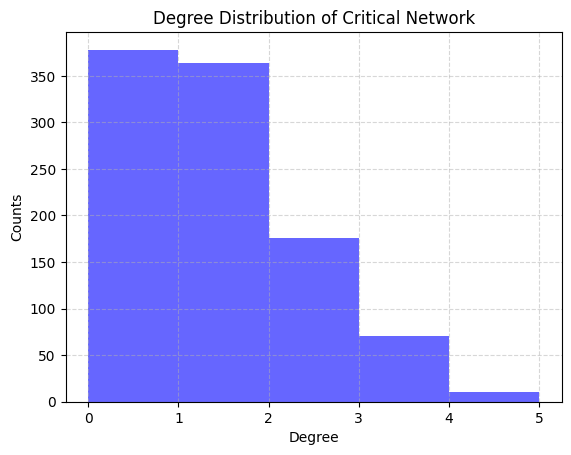

In [5]:
degrees = [G.degree(n) for n in G.nodes()]
print('Minimum degree: {}'.format(min(degrees)))
print('Maximum degree: {}'.format(max(degrees)))

# Add 1 to max degree to shift the intervals so the plotting is correct. 
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), alpha=0.6, color='b')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree Distribution of Critical Network')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [6]:
#Generating Erdős-Rényi Networks
N = 500
k1 = 0.8
p1 = k1 / (N-1)
k2 = 1
p2 = k2 / (N-1)
k3 = 8
p3 = k3 / (N-1)

k = 0.8
p = 0.0016032064128256513


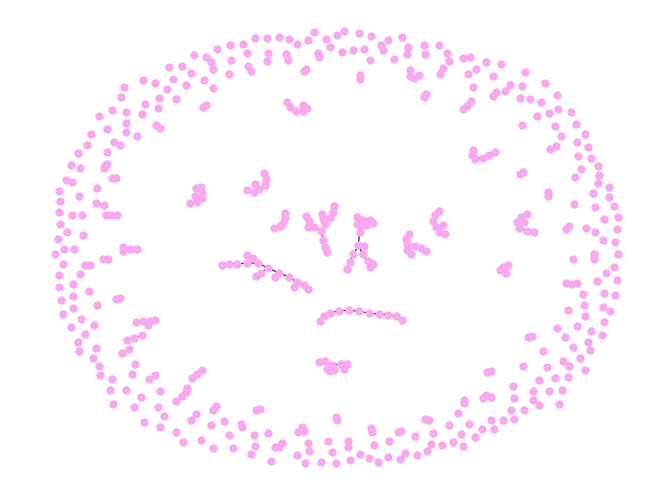

In [7]:
print('k = {}'.format(k1))
print('p = {}'.format(p1))
G1 = nx.erdos_renyi_graph(N, p1)
nx.draw(G1, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8)

k = 1
p = 0.002004008016032064


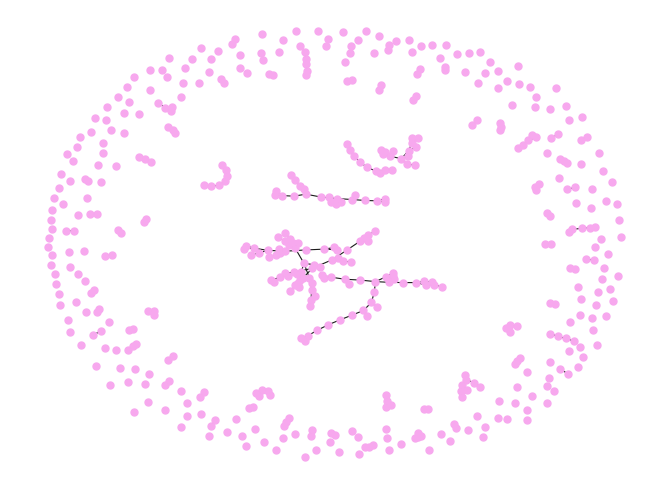

In [8]:
print('k = {}'.format(k2))
print('p = {}'.format(p2))
G2 = nx.erdos_renyi_graph(N, p2)
nx.draw(G2, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8)

k = 8
p = 0.01603206412825651


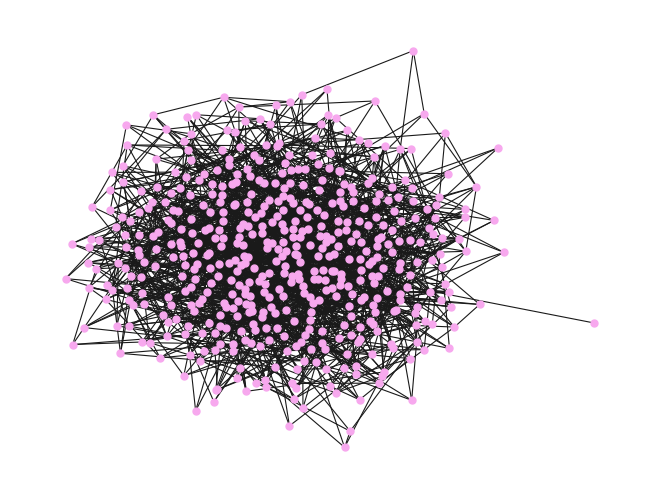

In [9]:
print('k = {}'.format(k3))
print('p = {}'.format(p3))
G3 = nx.erdos_renyi_graph(N, p3)
nx.draw(G3, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8)

* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

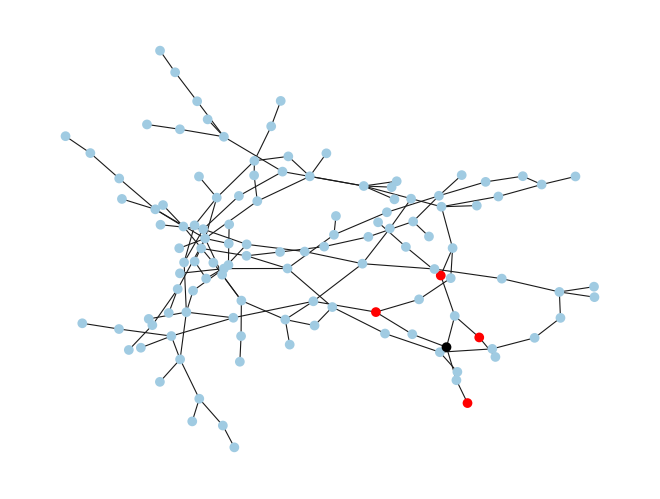

In [10]:
import networkx as nx
import random
import matplotlib.pyplot as plt

k = 1.5
N = 200
p = k/(N-1)

G = nx.erdos_renyi_graph(N, p)
components = list(nx.connected_components(G))
gcc = max(components, key=len)

# Create a subgraph containing only the GCC and get the closest components at distance = 2
gcc_graph = G.subgraph(gcc)
rand_node = random.choice(list(gcc))
paths = nx.single_source_shortest_path_length(G, rand_node)
close_nodes = [node for node, distance in paths.items() if distance == 2]
position = nx.spring_layout(gcc_graph)

# Create a dictionary of node colors, with default color as blue
node_colors = {node: "#A0CBE2" for node in gcc_graph.nodes()}
node_colors[rand_node] = "#000000"
for node in close_nodes:
    node_colors[node] = "#ff0000"

# Draw the GCC graph with node colors
nx.draw(gcc_graph, pos=position, node_size=25, node_color=list(node_colors.values()), node_shape='o', linewidths = 2., edge_color='.1', with_labels=False, width=0.8)

# Show the plot
plt.show()

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one.

In [11]:
import math
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from statistics import stdev, mean

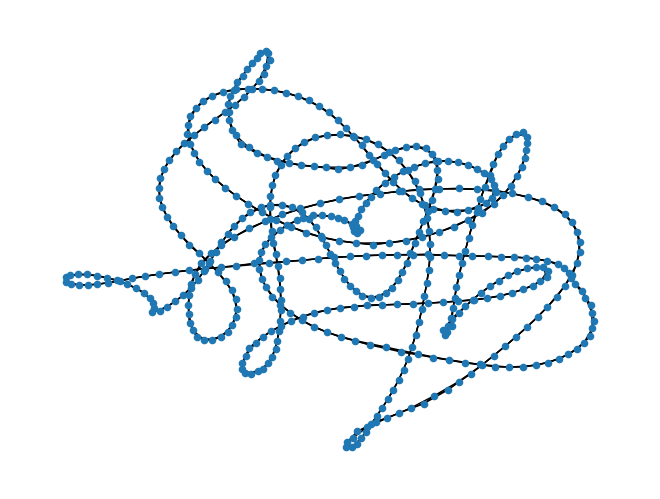

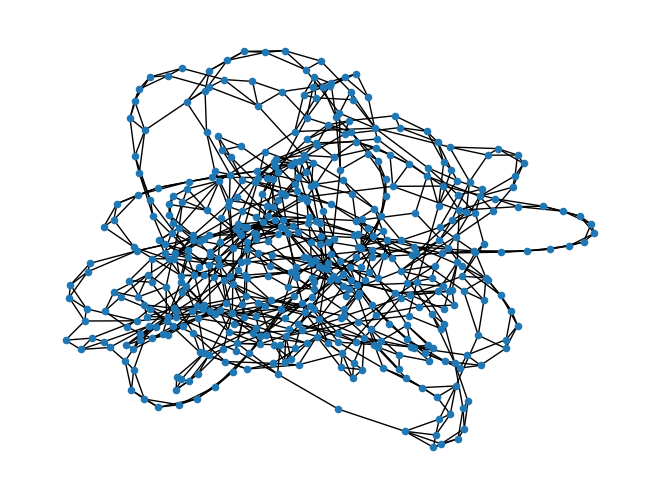

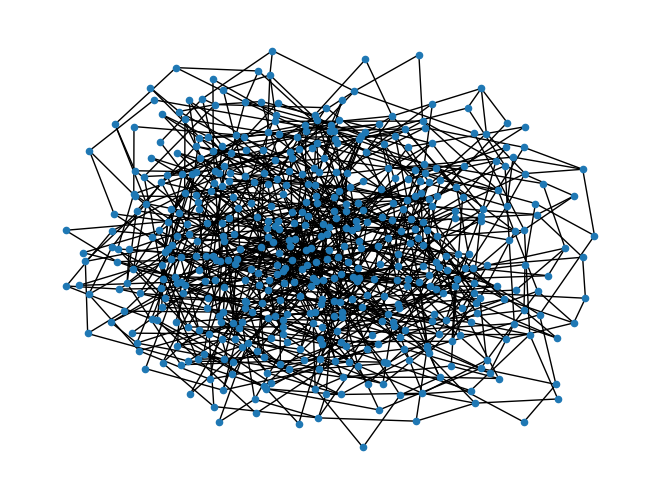

In [12]:
n = 500
k = 4 
probs = [0, 0.1, 1]

graphs = [nx.watts_strogatz_graph(n, k, p, seed=0) for p in probs]

plt.figure()
nx.draw(graphs[0], pos=nx.spring_layout(graphs[0]), with_labels=False, node_size = 20)
plt.show()

plt.figure()
nx.draw(graphs[1], pos=nx.spring_layout(graphs[1]), with_labels=False, node_size = 20)
plt.show()

plt.figure()
nx.draw(graphs[2], pos=nx.spring_layout(graphs[2]), with_labels=False, node_size = 20)
plt.show()

In [13]:
for i, graph in enumerate(graphs):
    print(f"Average distance for probability {probs[i]} is {nx.average_shortest_path_length(graph)}")

Average distance for probability 0 is 62.875751503006015
Average distance for probability 0.1 is 7.588921843687375
Average distance for probability 1 is 4.781082164328657


* Describe what happens to the network when $p = 1$.

When p = 1, every edge in the original regular ring lattice is rewired with a probability of 100%. In other words, all edges are completely randomized or replaced with new connections, and the resulting graph becomes a completely random Erdős-Rényi graph. In this case, the original regular structure is entirely lost, and the graph has no discernible small-world properties that are characteristic of Watts-Strogatz graphs with smaller values of "p." The graph essentially becomes a random network with no specific local structure.

* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [14]:
## THIS CELL TAKES A VERY LONG TIME TO RUN ##

probs = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_dist = []
std_dev = []
for p in probs:
    avg_dist_per_prob = []
    for _ in range(50):
        graph = nx.watts_strogatz_graph(n, k, p)
        avg_dist_per_prob.append(nx.average_shortest_path_length(graph))
    avg_dist.append(mean(avg_dist_per_prob))
    std_dev.append(stdev(avg_dist_per_prob))

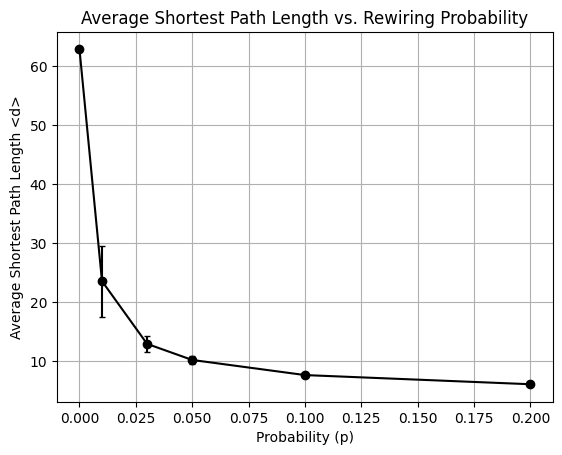

In [15]:
plt.errorbar(probs, avg_dist, yerr=std_dev, fmt='o-', color = 'black', capsize=2)
plt.xlabel('Probability (p)')
plt.ylabel('Average Shortest Path Length <d>')
plt.title('Average Shortest Path Length vs. Rewiring Probability')
plt.grid(True)
plt.show()

# Part 4: The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success

**Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.**

In [16]:
#this function chooses a random neighbor node from the graph, with a bias for nodes with more connections
def random_node(G): 
    #flattened list of all edges, with repeated entries (nodes) based on the number of edges the node has.
    neighbor = [node for edge in G.edges() for node in edge]
    #choose a random node
    return random.choice(neighbor)

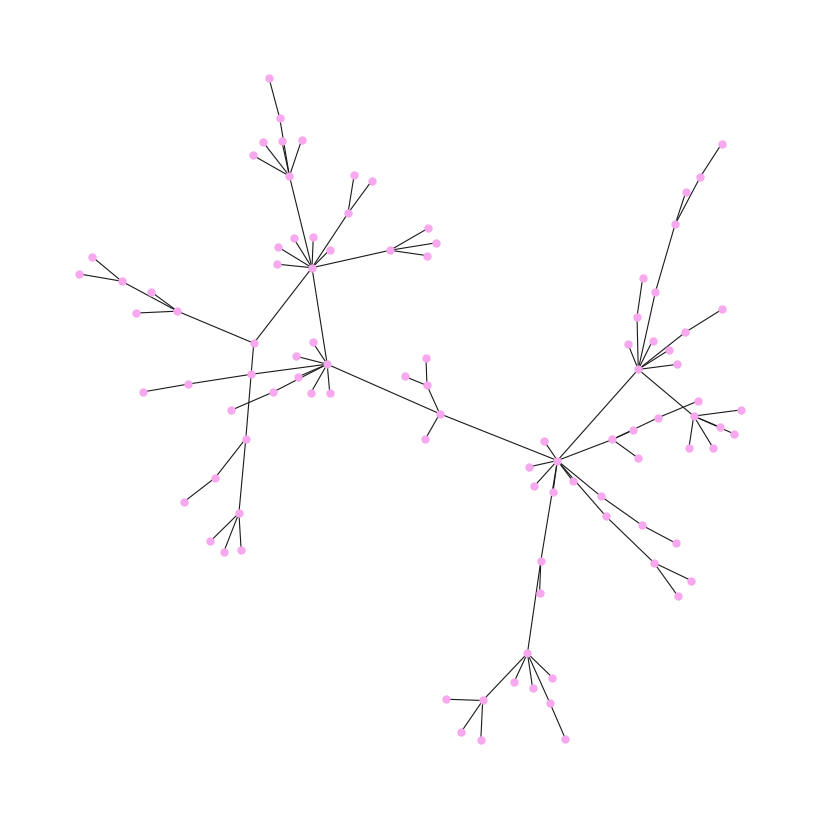

Network size : 100


In [17]:
#create the Barabasi-Albert graph

B_A = nx.Graph()

#create first node and link
B_A.add_nodes_from([1,2])
B_A.add_edge(1,2)

#number of nodes to add
num_nodes= 100

#add the remaining nodes (start at the third node)
for node in range(len(B_A.nodes())+1,num_nodes+1):
    B_A.add_edge(node, random_node(B_A))

plt.figure(1,figsize=(8,8))
nx.draw(B_A, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8, pos=nx.spring_layout(B_A))
plt.show()

print("Network size : %d" % len(B_A.nodes()))

**Now create a 5000 node network**


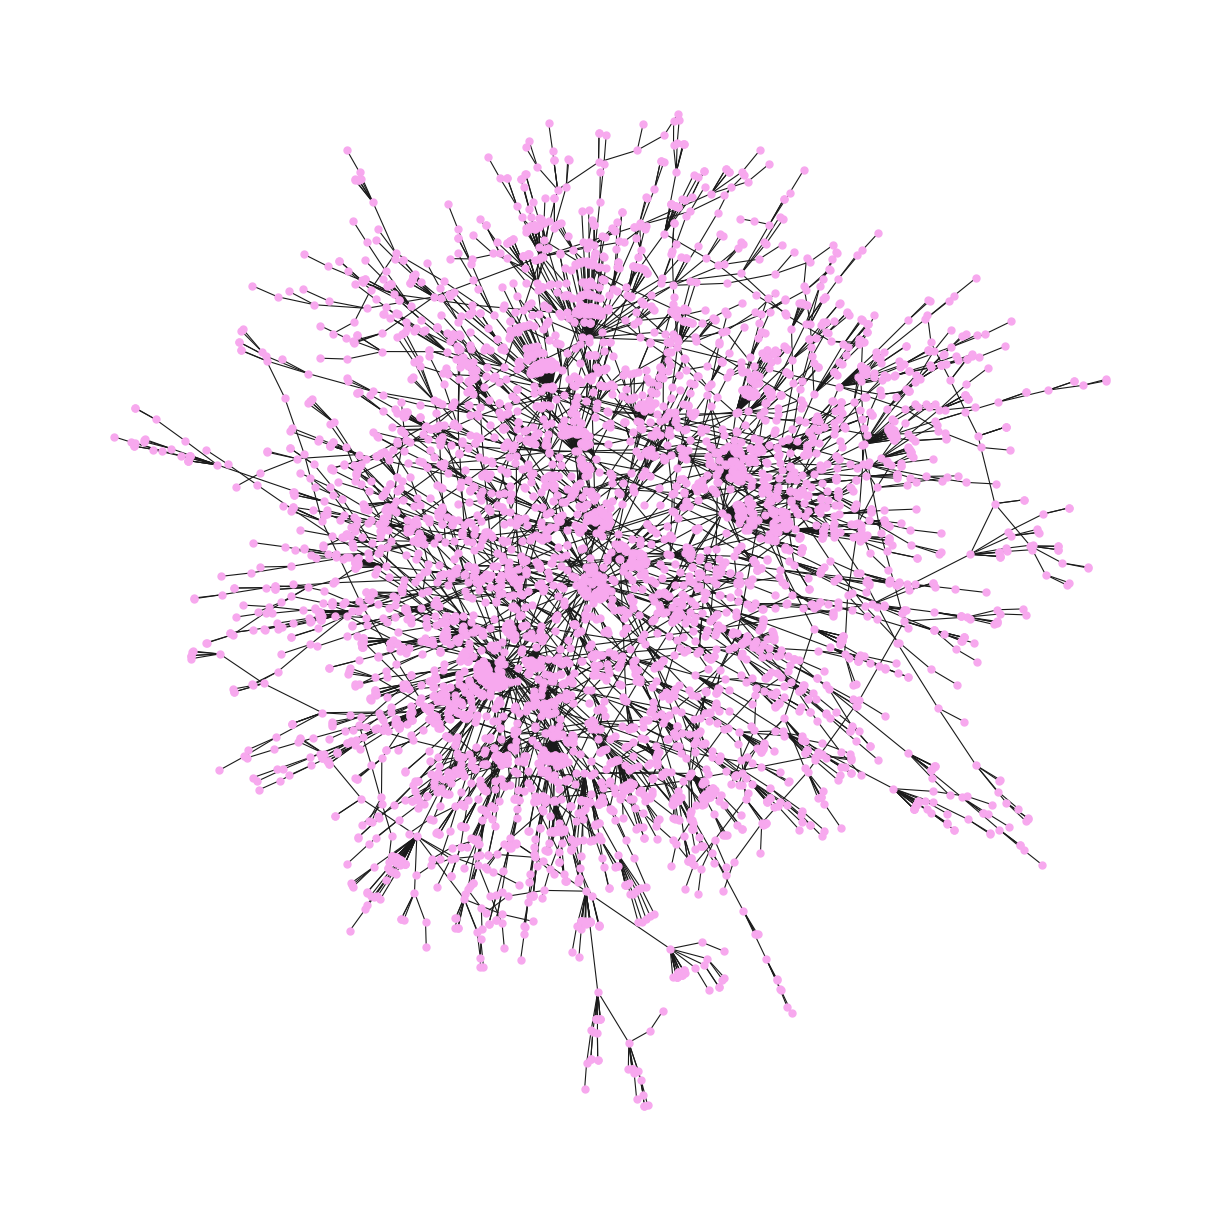

Network size : 5000


In [18]:
#create the Barabasi-Albert graph
B_A = nx.Graph()

#create first nodes and link them
B_A.add_nodes_from([1,2])
B_A.add_edge(1,2)

#number of nodes to add
num_nodes = 5000

# Add the remaining nodes (start at the third node)
for node in range(len(B_A.nodes())+1, num_nodes+1):
    B_A.add_edge(node, random_node(B_A))

plt.figure(1,figsize=(12,12))
nx.draw(B_A, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8, pos=nx.spring_layout(B_A))
plt.show()

print("Network size : %d" % len(B_A.nodes()))

**What's the maximum and minimum degree?**


In [19]:
#calculate the degrees of nodes in the Barabasi-Albert network
node_degrees = list(dict(nx.degree(B_A)).values())

# Compute min and max values for the degrees
max_node_degree = max(node_degrees)
min_node_degree = min(node_degrees)

print("Maximum node degree : %d" % max_node_degree)
print("Minimum node degree : %d" % min_node_degree)

Maximum node degree : 131
Minimum node degree : 1


**Now, bin the degree distribution, for example using numpy.histogram.**

In [20]:
#calculate the degrees of nodes in Barabasi-Albert and convert it to a list
#compute the bins for degree distribution
bins = [i for i in range(min_node_degree, max_node_degree+2)]

#the degree distribution histogram 
degrees_hist, degrees_bin = np.histogram(node_degrees, bins=bins)

**Plot the distribution. Plot it with both linear and log-log axes.**

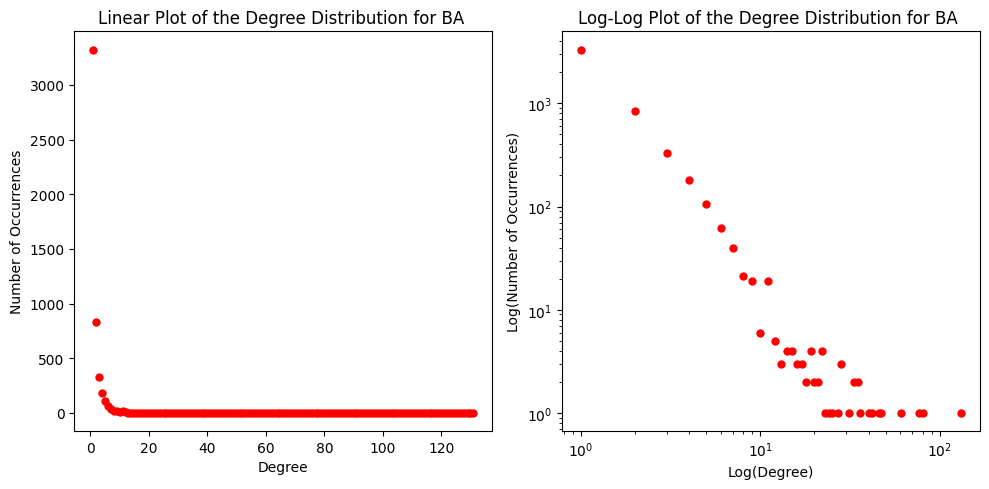

In [21]:
#Plot the degree distribution
plt.figure(figsize=(10, 5))

#Plot the linear degree distribution 
plt.subplot(1, 2, 1)
plt.plot(degrees_bin[:-1], degrees_hist, 'ro', markersize=5)
plt.xlabel('Degree')
plt.ylabel('Number of Occurrences')
plt.title('Linear Plot of the Degree Distribution for BA ')


#Plot the log-log degree distribution
plt.subplot(1, 2, 2)
plt.loglog(degrees_bin[:-1], degrees_hist, 'ro', markersize=5)
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Number of Occurrences)')
plt.title('Log-Log Plot of the Degree Distribution for BA ')


plt.tight_layout()
plt.show()

## Part 5: Power-laws and the friendship paradox

Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

**Pick a node i at random (e.g. use random.choice). Find its degree.**

In [22]:
import networkx as nx
import random 

# Choose a random node in the list of nodes
node_i = random.choice(list(B_A.nodes()))

# Retrieve the degree of that node
degree_i = B_A.degree(node_i)

print("Degree of node {} : {}".format(node_i, degree_i))

Degree of node 4330 : 1


In [23]:
import numpy as np

# Choose a random node in the list of nodes
i = random.choice(list(B_A.nodes()))

# Get the neighbors of node 'i' in the BA 
neighbors_i = list(B_A.neighbors(i))

# Calculate the degrees of each neighbor of node 'i'
degrees_neighbors_i = [B_A.degree(neighbor_i) for neighbor_i in neighbors_i]

# Calculate the average degree of node 'i''s neighbors
if len(degrees_neighbors_i) > 0:
    avg_degree_neighbors_i = np.average(degrees_neighbors_i)
else:
    avg_degree_neighbors_i = 0

print("Node %d has %d friends, whereas, on average, i's friends have %d friends."
      % (i, degree_i, avg_degree_neighbors_i))

Node 2285 has 1 friends, whereas, on average, i's friends have 3 friends.


**Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.**

In [24]:
def random_node_degree_and_friends(network):
    # Choose a random node in the list of nodes
    node_i = random.choice(list(network.nodes()))

    # Retrieve the degree of that node
    degree_i = network.degree(node_i)
    
    # Get the neighbors of node i
    neighbors_i = list(network.neighbors(node_i))
    
    # Retrieve the degree of each neighbor of node i and compute the average 
    degrees_neighbors_i = [network.degree(neighbor_i) for neighbor_i in neighbors_i]
    avg_degree_neighbors_i = np.average(degrees_neighbors_i)
    
    return (degree_i, avg_degree_neighbors_i)

def friend_paradox_holds(degree_i, avg_degree_neighbors_i):
    return degree_i < avg_degree_neighbors_i


friend_paradox_result = friend_paradox_holds(degree_i, avg_degree_neighbors_i)
print("Does the friend paradox hold true for the randomly chosen node? %s" % friend_paradox_result)

Does the friend paradox hold true for the randomly chosen node? True


**Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**

In [25]:
# Test the paradox 1000 times
nb_paradox_true = 0

for i in range(1000):
    (degree_i, avg_degree_neighbors_i) = random_node_degree_and_friends(B_A)
    # If the paradox is true, increment the count 
    if friend_paradox_holds(degree_i, avg_degree_neighbors_i):
        nb_paradox_true += 1

print("The paradox is true %d times out of 1000" % nb_paradox_true)

The paradox is true 865 times out of 1000


Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

**Compare to the ER network of same size and same p. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.**

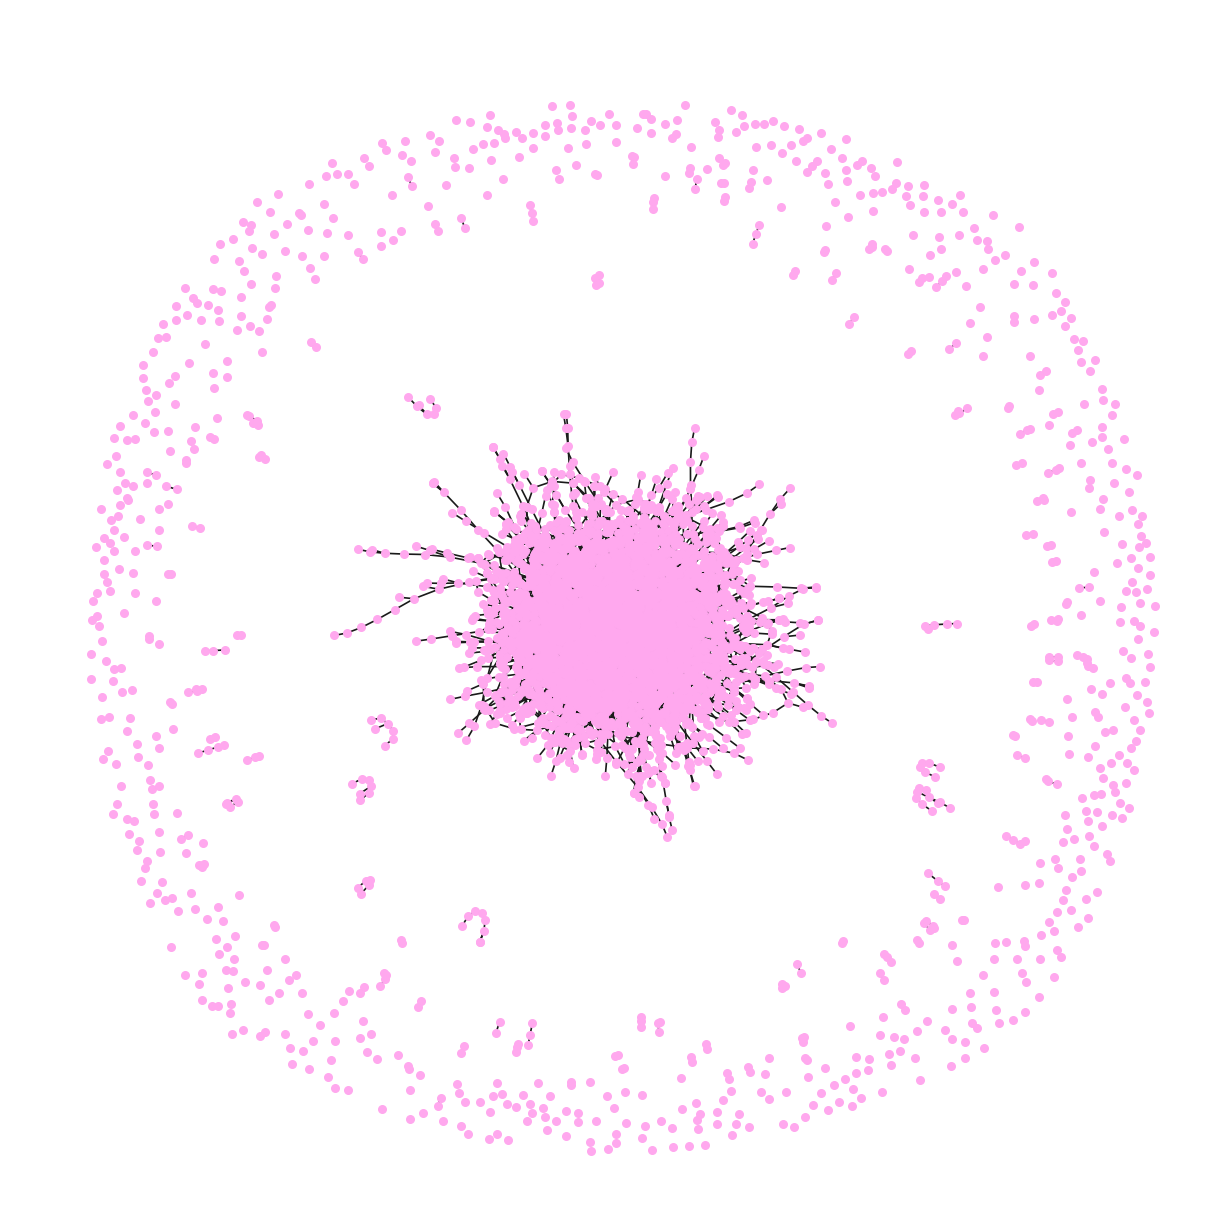

In [26]:
# Set the number of nodes and average degree
N = 5000
k= np.average(node_degrees) 

# Calculate the probability p for the Erdős-Rényi (ER) graph
p = k / (N - 1.)

# Create the ER graph using the calculated p
er_graph = nx.erdos_renyi_graph(N, p)

# Plot the ER graph
plt.figure(figsize=(12, 12))
nx.draw(er_graph, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()

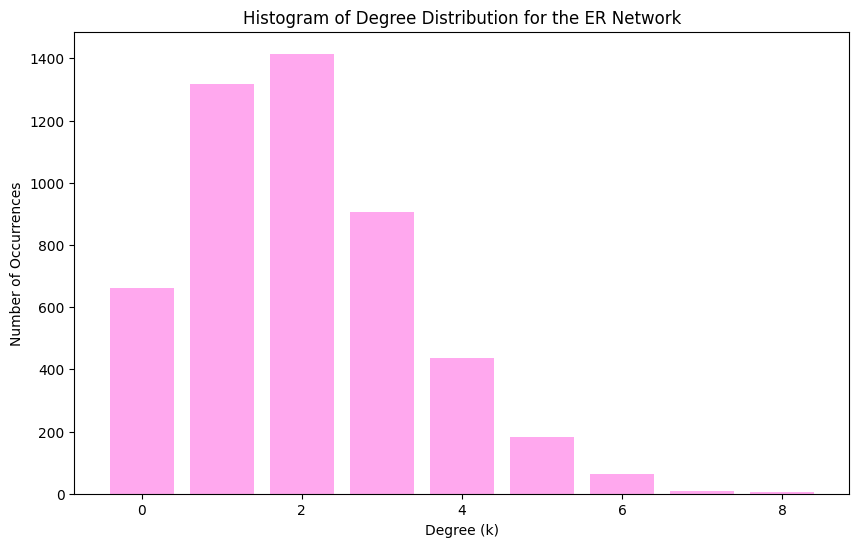

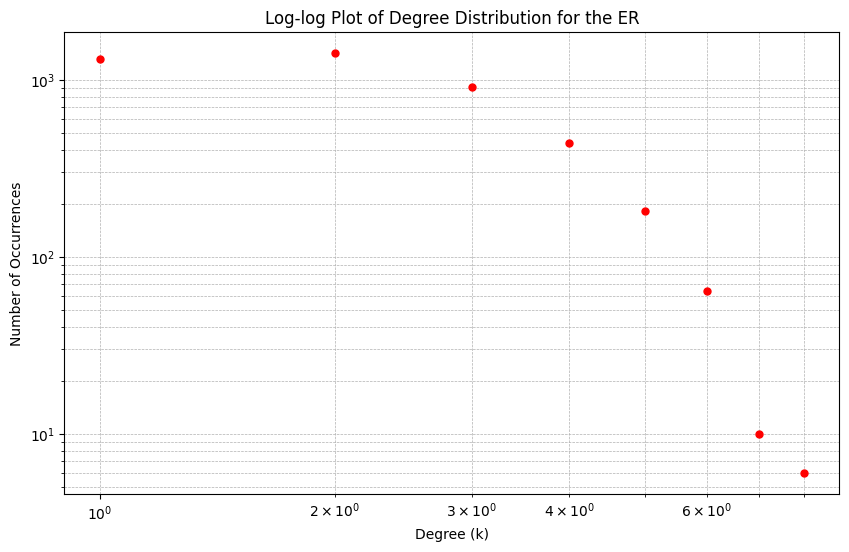

In [27]:

# Calculate the degree distribution of the ER graph
er_degrees = dict(nx.degree(er_graph)).values()

# Compute the bins for the degree distribution
bins = range(min(er_degrees), max(er_degrees) + 1)

# Calculate the degree histogram
er_degrees_hist, er_degrees_bin = np.histogram(list(er_degrees), bins=bins)

# Plot the linear degree distribution
plt.figure(figsize=(10, 6))
plt.bar(er_degrees_bin[:-1], er_degrees_hist, width=0.8, color='#FFA8EE')
plt.xlabel('Degree (k)')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of Degree Distribution for the ER Network')
plt.show()

# Plot the log-log degree distribution
plt.figure(figsize=(10, 6))
plt.loglog(er_degrees_bin[:-1], er_degrees_hist, 'ro', markersize=5)
plt.xlabel('Degree (k)')
plt.ylabel('Number of Occurrences')
plt.title('Log-log Plot of Degree Distribution for the ER')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [28]:
ER_nb_connected_comp = nx.number_connected_components(er_graph)
BA_nb_connected_comp = nx.number_connected_components(B_A)

print("Number of connected components in ER: %d" % ER_nb_connected_comp)
print("Number of connected components in BA: %d" % BA_nb_connected_comp)


Number of connected components in ER: 783
Number of connected components in BA: 1


The ER and BA networks differ significantly in two ways. To begin, BA networks show a wide range of node degrees, with some nodes acting as centers with multiple connections and others having fewer connections. ER networks, on the other hand, include evenly distributed degrees across nodes and a smaller degree variance. Furthermore, BA networks are normally completely connected, which means that each node is linked to at least one other node, removing isolated nodes. ER networks, on the other hand, can contain isolated nodes, which are nodes that are not connected to any other nodes. The degree distribution differences results from the preferential attachment mechanism in BA networks, in which well-connected nodes result more connections, which leads to a few highly linked centers and countless nodes with fewer degrees.

# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 

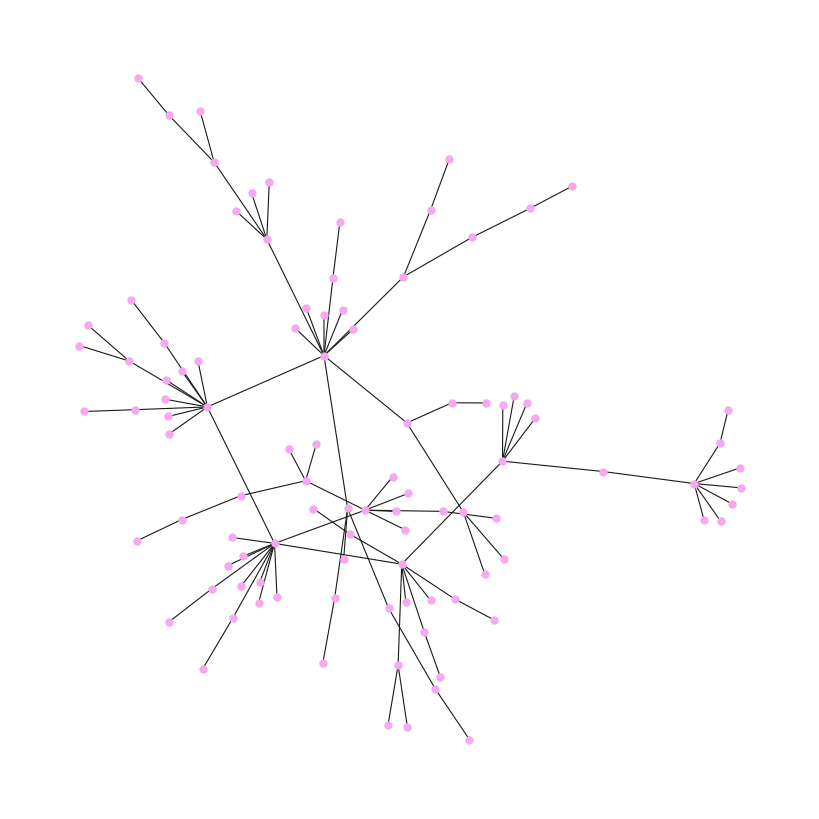

Network size : 100


In [29]:
#create the Barabasi-Albert graph

B_A = nx.Graph()

#create first node and link
B_A.add_nodes_from([1,2])
B_A.add_edge(1,2)

#number of nodes to add
num_nodes= 100

#add the remaining nodes (start at the third node)
for node in range(len(B_A.nodes())+1,num_nodes+1):
    B_A.add_edge(node, random_node(B_A))

plt.figure(1,figsize=(8,8))
nx.draw(B_A, node_size=25, node_color="#F7A8EE", node_shape='o', edge_color='.1', with_labels=False, width=0.8, pos=nx.spring_layout(B_A))
plt.show()

print("Network size : %d" % len(B_A.nodes()))

In [30]:
def config_model (degrees) :
    halfedges = [i for i, elem in enumerate(degrees) for _ in range(int(elem))]
    # print("Check if the following ouput matches what you expect 'halfedges' to look like")
    # print(halfedges)
    np.random.shuffle(halfedges) 
    edgelist = zip(halfedges[0::2], halfedges[1::2])
    return list(edgelist) #Return list of tuples indicating edges

* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?

[]

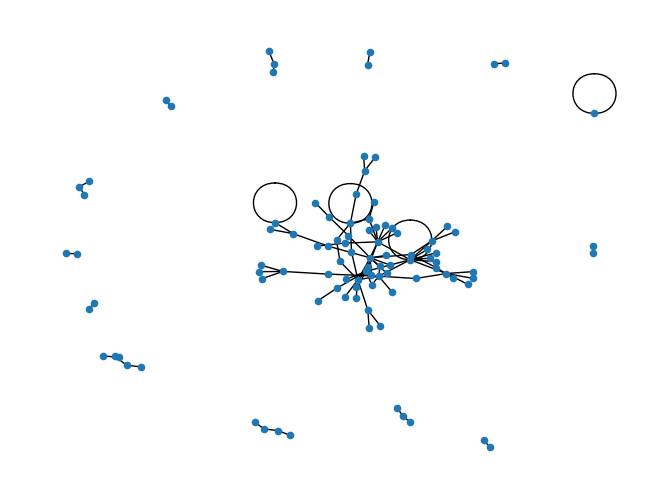

In [31]:
edges = config_model(dict(B_A.degree()).values())
g = nx.Graph(edges)
nx.draw(g, pos=nx.spring_layout(g), with_labels = False, node_size = 20)
plt.plot()

The nodes do not have the desired degree distribution.

* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.

In [32]:
degrees = list(3*np.ones(2500,)) + list(5*np.ones(2500,))
np.random.shuffle(degrees)

[]

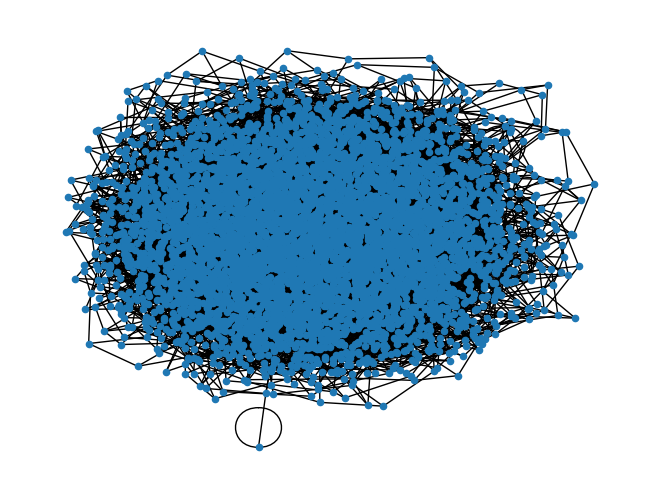

In [33]:
edges = config_model(degrees)
g = nx.Graph(edges)
nx.draw(g, pos=nx.spring_layout(g), with_labels = False, node_size = 20)
plt.plot()

* What should the sum of node degrees be if all nodes had degrees as described in the exercise?

The sum of the node degrees should be 2500*(3+5) = 20000

* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

In [34]:
sum_nodes = sum([g.degree(i) for i in g.nodes()])
print("Actual sum of node degrees: {}".format(sum_nodes))

Actual sum of node degrees: 19998


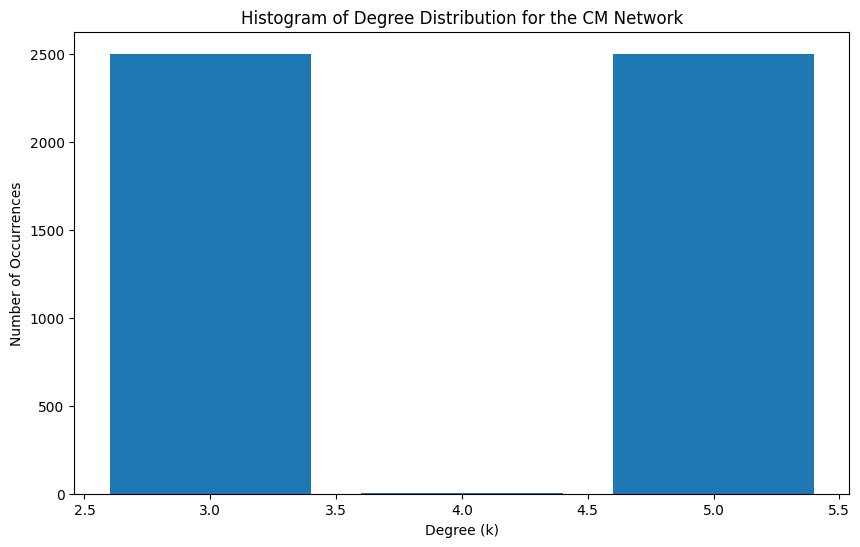

In [35]:
# Calculate the degree distribution of the ER graph
cm_degrees = dict(nx.degree(g)).values()

# Compute the bins for the degree distribution
bins = range(min(cm_degrees), max(cm_degrees) + 2)

# Calculate the degree histogram
cm_degrees_hist, cm_degrees_bin = np.histogram(list(cm_degrees), bins=bins)

# Plot the linear degree distribution
plt.figure(figsize=(10, 6))
plt.bar(cm_degrees_bin[:-1], cm_degrees_hist)
plt.xlabel('Degree (k)')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of Degree Distribution for the CM Network')
plt.show()

The configuration model generates a random pseudograph (graph with parallel edges and self loops) by randomly assigning edges to match the given degree sequence.